# UKHSA Vaccination Data Cleaning and Preprocessing
## 1. Imports

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, MinMaxScaler

## 2. Load the data to dataframes

In [2]:
csv_filepaths = [
"1_api_connectors_and_csv_parsers/2_processed_databases/ukhsa_vaccination_data/newPeopleVaccinatedCompleteByVaccinationDate_region.csv",
    
"1_api_connectors_and_csv_parsers/2_processed_databases/ukhsa_vaccination_data/newPeopleVaccinatedFirstDoseByVaccinationDate_region.csv",
    
"1_api_connectors_and_csv_parsers/2_processed_databases/ukhsa_vaccination_data/newPeopleVaccinatedSecondDoseByVaccinationDate_region.csv",
    
"1_api_connectors_and_csv_parsers/2_processed_databases/ukhsa_vaccination_data/newPeopleVaccinatedThirdInjectionByVaccinationDate_region.csv",
    
"1_api_connectors_and_csv_parsers/2_processed_databases/ukhsa_vaccination_data/VaccineRegisterPopulationByVaccinationDate_region.csv",
    
"1_api_connectors_and_csv_parsers/2_processed_databases/ukhsa_vaccination_data/vaccinationsAgeDemographics_region.csv"
]

In [3]:
csv_dataframes = []

for filepath in csv_filepaths:
    df_for_cleaning = pd.read_csv(filepath)
    csv_dataframes.append(df_for_cleaning)

In [4]:
reference_columns = csv_dataframes[0].columns
reference_columns

Index(['date', 'area_type', 'area_code', 'area_name', 'metric', 'metric_name',
       'value'],
      dtype='object')

In [5]:
metrics_for_merging = [0]

for i, dataframe in enumerate(csv_dataframes[1:]):    
    try:
        if (dataframe.columns == reference_columns).all():
            print("All columns are consistent and able to be merged.")
            metrics_for_merging.append(i+1)
            
    except ValueError:
            print(f"{dataframe.metric_name[0]} is not consistent and can't be merged.")
        

All columns are consistent and able to be merged.
All columns are consistent and able to be merged.
All columns are consistent and able to be merged.
All columns are consistent and able to be merged.
Vaccinations age demographics breakdown is not consistent and can't be merged.


### Reviewing the heads of the datagrames to see if the merge would preserve their integrity prior to cleaning
#### As you can see the datasets have the same columns and preserve their metric so would be suitable for merging

In [6]:
csv_dataframes[0].head

<bound method NDFrame.head of             date area_type  area_code                 area_name  \
0     2021-01-01    region  E12000005             West Midlands   
1     2021-01-01    region  E12000001                North East   
2     2021-01-01    region  E12000003  Yorkshire and The Humber   
3     2021-01-01    region  E12000009                South West   
4     2021-01-01    region  E12000004             East Midlands   
...          ...       ...        ...                       ...   
8612  2023-08-11    region  E12000006           East of England   
8613  2023-08-12    region  E12000006           East of England   
8614  2023-08-13    region  E12000006           East of England   
8615  2023-08-14    region  E12000006           East of England   
8616  2023-08-15    region  E12000006           East of England   

                                            metric  \
0     newPeopleVaccinatedCompleteByVaccinationDate   
1     newPeopleVaccinatedCompleteByVaccinationDate   
2  

In [7]:
csv_dataframes[1].head


<bound method NDFrame.head of             date area_type  area_code        area_name  \
0     2021-01-01    region  E12000008       South East   
1     2021-01-01    region  E12000005    West Midlands   
2     2021-01-01    region  E12000007           London   
3     2021-01-01    region  E12000006  East of England   
4     2021-01-01    region  E12000001       North East   
...          ...       ...        ...              ...   
8613  2023-08-21    region  E12000007           London   
8614  2023-08-21    region  E12000009       South West   
8615  2023-08-22    region  E12000009       South West   
8616  2023-08-22    region  E12000007           London   
8617  2023-08-23    region  E12000007           London   

                                             metric  \
0     newPeopleVaccinatedFirstDoseByVaccinationDate   
1     newPeopleVaccinatedFirstDoseByVaccinationDate   
2     newPeopleVaccinatedFirstDoseByVaccinationDate   
3     newPeopleVaccinatedFirstDoseByVaccinationDate  

In [8]:
csv_dataframes[2].head


<bound method NDFrame.head of             date area_type  area_code                 area_name  \
0     2020-12-08    region  E12000005             West Midlands   
1     2020-12-08    region  E12000008                South East   
2     2020-12-08    region  E12000004             East Midlands   
3     2020-12-08    region  E12000006           East of England   
4     2020-12-08    region  E12000001                North East   
...          ...       ...        ...                       ...   
8612  2022-12-31    region  E12000008                South East   
8613  2022-12-31    region  E12000009                South West   
8614  2022-12-31    region  E12000006           East of England   
8615  2022-12-31    region  E12000005             West Midlands   
8616  2022-12-31    region  E12000003  Yorkshire and The Humber   

                                              metric  \
0     newPeopleVaccinatedSecondDoseByVaccinationDate   
1     newPeopleVaccinatedSecondDoseByVaccinationDate 

In [9]:
csv_dataframes[3].head

<bound method NDFrame.head of             date area_type  area_code                 area_name  \
0     2023-01-01    region  E12000004             East Midlands   
1     2023-01-01    region  E12000006           East of England   
2     2023-01-01    region  E12000003  Yorkshire and The Humber   
3     2023-01-01    region  E12000005             West Midlands   
4     2023-01-01    region  E12000002                North West   
...          ...       ...        ...                       ...   
9866  2021-12-31    region  E12000009                South West   
9867  2021-12-31    region  E12000003  Yorkshire and The Humber   
9868  2021-12-31    region  E12000001                North East   
9869  2021-12-31    region  E12000005             West Midlands   
9870  2021-12-31    region  E12000002                North West   

                                                 metric  \
0     newPeopleVaccinatedThirdInjectionByVaccination...   
1     newPeopleVaccinatedThirdInjectionByVaccin

In [10]:
csv_dataframes[4].head


<bound method NDFrame.head of             date area_type  area_code                 area_name  \
0     2023-01-01    region  E12000006           East of England   
1     2023-01-01    region  E12000009                South West   
2     2023-01-01    region  E12000008                South East   
3     2023-01-01    region  E12000003  Yorkshire and The Humber   
4     2023-01-01    region  E12000001                North East   
...          ...       ...        ...                       ...   
9904  2021-12-31    region  E12000002                North West   
9905  2021-12-31    region  E12000009                South West   
9906  2021-12-31    region  E12000004             East Midlands   
9907  2021-12-31    region  E12000006           East of England   
9908  2021-12-31    region  E12000001                North East   

                                          metric  \
0     VaccineRegisterPopulationByVaccinationDate   
1     VaccineRegisterPopulationByVaccinationDate   
2     Vac

In [11]:
metrics_for_merging

[0, 1, 2, 3, 4]

In [12]:
merged_vaccine_dataframe = csv_dataframes[0]

# for i, dataframe in enumerate(csv_dataframes[1:-1]):
#     merged_vaccine_dataframe = pd.merge(merged_vaccine_dataframe, csv_dataframes[i+1], on=['date', 'area_code', 'area_name', 'area_type'], suffixes=(f'_df{i+1}', f'_df{i+2}'))
for i, dataframe in enumerate(csv_dataframes[1:-1]):
    merged_vaccine_dataframe = pd.merge(
        merged_vaccine_dataframe, csv_dataframes[i+1], 
        on=['date', 'area_code', 'area_name', 'area_type'], 
        how='outer', 
        suffixes=(f'_df{i+1}', f'_df{i+2}')
    )

merged_vaccine_dataframe

,date,area_type,area_code,area_name,metric_df1,metric_name_df1,value_df1,metric_df2,metric_name_df2,value_df2,metric_df3,metric_name_df3,value_df3,metric_df4,metric_name_df4,value_df4,metric,metric_name,value
0,2020-12-08,region,E12000001,North East,newPeopleVaccinatedCompleteByVaccinationDate,New people fully vaccinated by vaccination date,7.0,newPeopleVaccinatedFirstDoseByVaccinationDate,New people vaccinated with a first dose by vac...,473.0,newPeopleVaccinatedSecondDoseByVaccinationDate,New people vaccinated with a second dose by va...,7.0,NaN,NaN,NaN,VaccineRegisterPopulationByVaccinationDate,Vaccination register (NIMS) population by vacc...,2509369.0
1,2020-12-08,region,E12000002,North West,newPeopleVaccinatedCompleteByVaccinationDate,New people fully vaccinated by vaccination date,75.0,newPeopleVaccinatedFirstDoseByVaccinationDate,New people vaccinated with a first dose by vac...,922.0,newPeopleVaccinatedSecondDoseByVaccinationDate,New people vaccinated with a second dose by va...,75.0,NaN,NaN,NaN,VaccineRegisterPopulationByVaccinationDate,Vaccination register (NIMS) population by vacc...,7085990.0
2,2020-12-08,region,E12000003,Yorkshire and The Humber,newPeopleVaccinatedCompleteByVaccinationDate,New people fully vaccinated by vaccination date,1.0,newPeopleVaccinatedFirstDoseByVaccinationDate,New people vaccinated with a first dose by vac...,375.0,newPeopleVaccinatedSecondDoseByVaccinationDate,New people vaccinated with a second dose by va...,1.0,NaN,NaN,NaN,VaccineRegisterPopulationByVaccinationDate,Vaccination register (NIMS) population by vacc...,5201594.0
3,2020-12-08,region,E12000004,East Midlands,newPeopleVaccinatedCompleteByVaccinationDate,New people fully vaccinated by vaccination date,7.0,newPeopleVaccinatedFirstDoseByVaccinationDate,New people vaccinated with a first dose by vac...,756.0,newPeopleVaccinatedSecondDoseByVaccinationDate,New people vaccinated with a second dose by va...,7.0,NaN,NaN,NaN,VaccineRegisterPopulationByVaccinationDate,Vaccination register (NIMS) population by vacc...,4626975.0
4,2020-12-08,region,E12000005,West Midlands,newPeopleVaccinatedCompleteByVaccinationDate,New people fully vaccinated by vaccination date,17.0,newPeopleVaccinatedFirstDoseByVaccinationDate,New people vaccinated with a first dose by vac...,277.0,newPeopleVaccinatedSecondDoseByVaccinationDate,New people vaccinated with a second dose by va...,17.0,NaN,NaN,NaN,VaccineRegisterPopulationByVaccinationDate,Vaccination register (NIMS) population by vacc...,5679253.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9904,2023-12-13,region,E12000005,West Midlands,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,newPeopleVaccinatedThirdInjectionByVaccination...,New people vaccinated with a booster or third ...,43.0,VaccineRegisterPopulationByVaccinationDate,Vaccination register (NIMS) population by vacc...,5679253.0
9905,2023-12-13,region,E12000006,East of England,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,newPeopleVaccinatedThirdInjectionByVaccination...,New people vaccinated with a booster or third ...,41.0,VaccineRegisterPopulationByVaccinationDate,Vaccination register (NIMS) population by vacc...,6022362.0
9906,2023-12-13,region,E12000007,London,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,newPeopleVaccinatedThirdInjectionByVaccination...,New people vaccinated with a booster or third ...,84.0,VaccineRegisterPopulationByVaccinationDate,Vaccination register (NIMS) population by vacc...,9537178.0
9907,2023-12-13,region,E12000008,South East,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,newPeopleVaccinatedThirdInjectionByVaccination...,New people vaccinated with a booster or third ...,68.0,VaccineRegisterPopulationByVaccinationDate,Vaccination register (NIMS) population by vacc...,8855622.0


In [13]:
demographics_dataframe = csv_dataframes[5]

## 3. Exploring and Understanding the Data
### I first use the .info() method to describe both tables, as you can see the demographics dataframe is considerably more comprehensive, in addition there are some clear areas which will need to be addressed (incorrect data types and missing data)

In [14]:
for dataframe in csv_dataframes[0:5]:
    print(dataframe.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8617 entries, 0 to 8616
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   date         8617 non-null   object 
 1   area_type    8617 non-null   object 
 2   area_code    8617 non-null   object 
 3   area_name    8617 non-null   object 
 4   metric       8617 non-null   object 
 5   metric_name  8617 non-null   object 
 6   value        8617 non-null   float64
dtypes: float64(1), object(6)
memory usage: 471.4+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8618 entries, 0 to 8617
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   date         8618 non-null   object 
 1   area_type    8618 non-null   object 
 2   area_code    8618 non-null   object 
 3   area_name    8618 non-null   object 
 4   metric       8618 non-null   object 
 5   metric_name  8618 non-null   object 
 6   value     

In [15]:
merged_vaccine_dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9909 entries, 0 to 9908
Data columns (total 19 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   date             9909 non-null   object 
 1   area_type        9909 non-null   object 
 2   area_code        9909 non-null   object 
 3   area_name        9909 non-null   object 
 4   metric_df1       8617 non-null   object 
 5   metric_name_df1  8617 non-null   object 
 6   value_df1        8617 non-null   float64
 7   metric_df2       8618 non-null   object 
 8   metric_name_df2  8618 non-null   object 
 9   value_df2        8618 non-null   float64
 10  metric_df3       8617 non-null   object 
 11  metric_name_df3  8617 non-null   object 
 12  value_df3        8617 non-null   float64
 13  metric_df4       9871 non-null   object 
 14  metric_name_df4  9871 non-null   object 
 15  value_df4        9871 non-null   float64
 16  metric           9909 non-null   object 
 17  metric_name   

In [16]:
demographics_dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 208089 entries, 0 to 208088
Data columns (total 26 columns):
 #   Column                                                         Non-Null Count   Dtype  
---  ------                                                         --------------   -----  
 0   date                                                           208089 non-null  object 
 1   area_type                                                      208089 non-null  object 
 2   area_code                                                      208089 non-null  object 
 3   area_name                                                      208089 non-null  object 
 4   metric                                                         208089 non-null  object 
 5   metric_name                                                    208089 non-null  object 
 6   age                                                            208089 non-null  object 
 7   cumPeopleVaccinatedAutumn22ByVaccinationDate   

### As you can see the demographics dataframe has much more rich information than the combined metric dataframes as it stratifies vaccination by age whilst still including details on multiple metrics! This is the dataframe we will therefore be cleaning going forward.

### I review the shape of the dataframe - as you can see there are 208089 rows with 26 columns of data, quite a considerable dataset.

In [17]:
# Checking the shape of the dataframe
demographics_dataframe.shape

(208089, 26)

### I have a look at the head, tail and sample of the data to get a feel for the data


In [18]:
# Checking the top rows of the dataframe
demographics_dataframe.head(30)

,date,area_type,area_code,area_name,metric,metric_name,age,cumPeopleVaccinatedAutumn22ByVaccinationDate,cumPeopleVaccinatedCompleteByVaccinationDate,cumPeopleVaccinatedSecondDoseByVaccinationDate,...,cumVaccinationSecondDoseUptakeByVaccinationDatePercentage,cumVaccinationSpring22UptakeByVaccinationDatePercentage,cumVaccinationThirdInjectionUptakeByVaccinationDatePercentage,newPeopleVaccinatedAutumn22ByVaccinationDate,newPeopleVaccinatedCompleteByVaccinationDate,newPeopleVaccinatedFirstDoseByVaccinationDate,newPeopleVaccinatedSecondDoseByVaccinationDate,newPeopleVaccinatedSpring22ByVaccinationDate,newPeopleVaccinatedSpring23ByVaccinationDate,VaccineRegisterPopulationByVaccinationDate
0,2022-01-01,region,E12000003,Yorkshire and The Humber,vaccinationsAgeDemographics,Vaccinations age demographics breakdown,05_11,NaN,7.0,7.0,...,0.0,NaN,0.0,NaN,0,0,0,NaN,NaN,484231
1,2022-01-01,region,E12000003,Yorkshire and The Humber,vaccinationsAgeDemographics,Vaccinations age demographics breakdown,12_15,NaN,3510.0,3510.0,...,1.2,NaN,0.0,NaN,24,29,24,NaN,NaN,288773
2,2022-01-01,region,E12000003,Yorkshire and The Humber,vaccinationsAgeDemographics,Vaccinations age demographics breakdown,16_17,NaN,4875.0,4875.0,...,3.5,NaN,0.0,NaN,29,18,29,NaN,NaN,137934
3,2022-01-01,region,E12000003,Yorkshire and The Humber,vaccinationsAgeDemographics,Vaccinations age demographics breakdown,18_24,NaN,281111.0,281111.0,...,54.8,NaN,17.9,NaN,69,35,69,NaN,NaN,513378
4,2022-01-01,region,E12000003,Yorkshire and The Humber,vaccinationsAgeDemographics,Vaccinations age demographics breakdown,25_29,NaN,242248.0,242248.0,...,58.8,NaN,24.3,NaN,26,29,26,NaN,NaN,412127
5,2022-01-01,region,E12000003,Yorkshire and The Humber,vaccinationsAgeDemographics,Vaccinations age demographics breakdown,30_34,NaN,270115.0,270115.0,...,62.3,NaN,29.4,NaN,32,24,32,NaN,NaN,433774
6,2022-01-01,region,E12000003,Yorkshire and The Humber,vaccinationsAgeDemographics,Vaccinations age demographics breakdown,35_39,NaN,287245.0,287245.0,...,67.6,NaN,36.6,NaN,17,13,17,NaN,NaN,424858
7,2022-01-01,region,E12000003,Yorkshire and The Humber,vaccinationsAgeDemographics,Vaccinations age demographics breakdown,40_44,NaN,289624.0,289624.0,...,73.7,NaN,45.9,NaN,14,13,14,NaN,NaN,392969
8,2022-01-01,region,E12000003,Yorkshire and The Humber,vaccinationsAgeDemographics,Vaccinations age demographics breakdown,45_49,NaN,273924.0,273924.0,...,79.6,NaN,55.4,NaN,10,4,10,NaN,NaN,344112
9,2022-01-01,region,E12000003,Yorkshire and The Humber,vaccinationsAgeDemographics,Vaccinations age demographics breakdown,50+,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,0,0,0,NaN,NaN,0


In [19]:
# Checking the ending rows of the dataframe
demographics_dataframe.tail()

,date,area_type,area_code,area_name,metric,metric_name,age,cumPeopleVaccinatedAutumn22ByVaccinationDate,cumPeopleVaccinatedCompleteByVaccinationDate,cumPeopleVaccinatedSecondDoseByVaccinationDate,...,cumVaccinationSecondDoseUptakeByVaccinationDatePercentage,cumVaccinationSpring22UptakeByVaccinationDatePercentage,cumVaccinationThirdInjectionUptakeByVaccinationDatePercentage,newPeopleVaccinatedAutumn22ByVaccinationDate,newPeopleVaccinatedCompleteByVaccinationDate,newPeopleVaccinatedFirstDoseByVaccinationDate,newPeopleVaccinatedSecondDoseByVaccinationDate,newPeopleVaccinatedSpring22ByVaccinationDate,newPeopleVaccinatedSpring23ByVaccinationDate,VaccineRegisterPopulationByVaccinationDate
208084,2020-12-31,region,E12000008,South East,vaccinationsAgeDemographics,Vaccinations age demographics breakdown,75+,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,0,0,0,NaN,NaN,0
208085,2020-12-31,region,E12000008,South East,vaccinationsAgeDemographics,Vaccinations age demographics breakdown,75_79,NaN,155.0,155.0,...,0.0,NaN,0.0,NaN,2,582,2,NaN,NaN,434632
208086,2020-12-31,region,E12000008,South East,vaccinationsAgeDemographics,Vaccinations age demographics breakdown,80_84,NaN,121.0,121.0,...,0.0,NaN,0.0,NaN,23,1807,23,NaN,NaN,268600
208087,2020-12-31,region,E12000008,South East,vaccinationsAgeDemographics,Vaccinations age demographics breakdown,85_89,NaN,102.0,102.0,...,0.1,NaN,0.0,NaN,36,1942,36,NaN,NaN,171018
208088,2020-12-31,region,E12000008,South East,vaccinationsAgeDemographics,Vaccinations age demographics breakdown,90+,NaN,35.0,35.0,...,0.0,NaN,0.0,NaN,9,1234,9,NaN,NaN,102997


In [20]:
# Random Sample of the dataframe
demographics_dataframe.sample(5)

,date,area_type,area_code,area_name,metric,metric_name,age,cumPeopleVaccinatedAutumn22ByVaccinationDate,cumPeopleVaccinatedCompleteByVaccinationDate,cumPeopleVaccinatedSecondDoseByVaccinationDate,...,cumVaccinationSecondDoseUptakeByVaccinationDatePercentage,cumVaccinationSpring22UptakeByVaccinationDatePercentage,cumVaccinationThirdInjectionUptakeByVaccinationDatePercentage,newPeopleVaccinatedAutumn22ByVaccinationDate,newPeopleVaccinatedCompleteByVaccinationDate,newPeopleVaccinatedFirstDoseByVaccinationDate,newPeopleVaccinatedSecondDoseByVaccinationDate,newPeopleVaccinatedSpring22ByVaccinationDate,newPeopleVaccinatedSpring23ByVaccinationDate,VaccineRegisterPopulationByVaccinationDate
24522,2022-05-10,region,E12000005,West Midlands,vaccinationsAgeDemographics,Vaccinations age demographics breakdown,70_74,NaN,266569.0,266569.0,...,94.1,NaN,90.3,NaN,2,1,2,NaN,NaN,283334
117229,2023-09-13,region,E12000002,North West,vaccinationsAgeDemographics,Vaccinations age demographics breakdown,40_44,NaN,404896.0,404896.0,...,74.0,NaN,55.0,NaN,0,0,0,NaN,NaN,546956
153568,2021-04-11,region,E12000005,West Midlands,vaccinationsAgeDemographics,Vaccinations age demographics breakdown,75+,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,0,0,0,NaN,NaN,0
74570,2023-01-30,region,E12000005,West Midlands,vaccinationsAgeDemographics,Vaccinations age demographics breakdown,90+,45795.0,53993.0,53993.0,...,94.3,76.857,91.9,7.0,0,0,0,0.0,0.0,57249
30186,2022-06-09,region,E12000007,London,vaccinationsAgeDemographics,Vaccinations age demographics breakdown,50+,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,0,0,0,NaN,NaN,0


### From having a look at the tables I am pretty confident that the area type, metric column and metric_name column all have values which are the same and not necessary for the data processing - these are candidates to be dropped from the dataset. I confirm this with the nunique function:

In [21]:
for column in demographics_dataframe.columns:
    if demographics_dataframe[column].nunique() == 1:
        print(f"All values in the {column} column are the same.")

All values in the area_type column are the same.
All values in the metric column are the same.
All values in the metric_name column are the same.


### In addition, I do not need the area_code as well as the area_name and will stick to the area name as this will be used for plotting, I will need to ensure that there are no errors in the area_name column. I confirm that the regions area all accurate with the .unique() method

In [22]:
unique_area_name_values = demographics_dataframe['area_name'].unique()
unique_area_name_values

array(['Yorkshire and The Humber', 'West Midlands', 'East Midlands',
       'South West', 'London', 'East of England', 'South East',
       'North East', 'North West'], dtype=object)

### This is appropriate there are no misspellings to account for or leading/trailing whitespace as the unique function would have registered them as unique values

In [23]:
# Summary statistics of numerical columns
demographics_dataframe.describe()

,cumPeopleVaccinatedAutumn22ByVaccinationDate,cumPeopleVaccinatedCompleteByVaccinationDate,cumPeopleVaccinatedSecondDoseByVaccinationDate,cumPeopleVaccinatedSpring22ByVaccinationDate,cumPeopleVaccinatedSpring23ByVaccinationDate,cumPeopleVaccinatedThirdInjectionByVaccinationDate,cumVaccinationAutumn23UptakeByVaccinationDatePercentage,cumVaccinationCompleteCoverageByVaccinationDatePercentage,cumVaccinationFirstDoseUptakeByVaccinationDatePercentage,cumVaccinationSecondDoseUptakeByVaccinationDatePercentage,cumVaccinationSpring22UptakeByVaccinationDatePercentage,cumVaccinationThirdInjectionUptakeByVaccinationDatePercentage,newPeopleVaccinatedAutumn22ByVaccinationDate,newPeopleVaccinatedCompleteByVaccinationDate,newPeopleVaccinatedFirstDoseByVaccinationDate,newPeopleVaccinatedSecondDoseByVaccinationDate,newPeopleVaccinatedSpring22ByVaccinationDate,newPeopleVaccinatedSpring23ByVaccinationDate,VaccineRegisterPopulationByVaccinationDate
count,5.065000e+04,178389.000000,178389.000000,28485.000000,28485.000000,178389.000000,50650.000000,178389.000000,178389.000000,178389.000000,28485.000000,178389.000000,50652.000000,208089.000000,208089.000000,208089.000000,28485.000000,28485.000000,2.080890e+05
mean,3.646302e+05,208770.329807,208770.329807,166861.709882,58931.455854,135364.964734,7.728716,61.462992,68.992574,61.462992,71.141623,41.352291,858.326996,199.958518,209.912835,199.958518,280.450834,270.301141,4.100393e+05
std,4.651947e+05,166443.189411,166443.189411,154251.972303,118850.242073,144365.465144,19.555451,35.457757,31.710084,35.457757,16.155976,38.537684,3661.310023,878.898214,1039.026513,878.898214,1123.382940,1368.360449,4.214998e+05
min,1.000000e+00,0.000000,0.000000,36.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.063000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00
25%,1.041960e+05,54636.000000,54636.000000,62222.000000,0.000000,63.000000,0.000000,30.300000,60.400000,30.300000,64.216000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.677910e+05
50%,2.136170e+05,188928.000000,188928.000000,115913.000000,0.000000,91047.000000,0.000000,73.700000,80.600000,73.700000,76.099000,40.200000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,3.560860e+05
75%,3.737975e+05,326737.000000,326737.000000,199516.000000,68766.000000,243671.000000,0.000000,92.300000,94.000000,92.300000,82.349000,83.000000,91.000000,24.000000,20.000000,24.000000,6.000000,0.000000,4.990870e+05
max,2.760445e+06,631161.000000,631161.000000,743731.000000,735033.000000,578482.000000,82.621000,97.700000,98.000000,97.700000,86.661000,96.700000,90393.000000,28128.000000,47250.000000,28128.000000,29917.000000,52190.000000,3.915131e+06


In [24]:
# Check for missing values
demographics_dataframe.isnull().sum()

date                                                                  0
area_type                                                             0
area_code                                                             0
area_name                                                             0
metric                                                                0
metric_name                                                           0
age                                                                   0
cumPeopleVaccinatedAutumn22ByVaccinationDate                     157439
cumPeopleVaccinatedCompleteByVaccinationDate                      29700
cumPeopleVaccinatedSecondDoseByVaccinationDate                    29700
cumPeopleVaccinatedSpring22ByVaccinationDate                     179604
cumPeopleVaccinatedSpring23ByVaccinationDate                     179604
cumPeopleVaccinatedThirdInjectionByVaccinationDate                29700
cumVaccinationAutumn23UptakeByVaccinationDatePercentage         

### The information seems appropriate as some of the metrics only span a certain amount of time (e.g. for the booster vaccines - only certain age groups were able to get the booser in Spring/Autum 22 and Spring 23 - those above 75). The primary sets of newPeopleVaccinatedCompleteByVaccinationDate, newPeopleVaccinatedFirstDoseByVaccinationDate, newPeopleVaccinatedSecondDoseByVaccinationDate, VaccineRegisterPopulationByVaccinationDate all seem appropriate and contain no null values.

<Axes: >

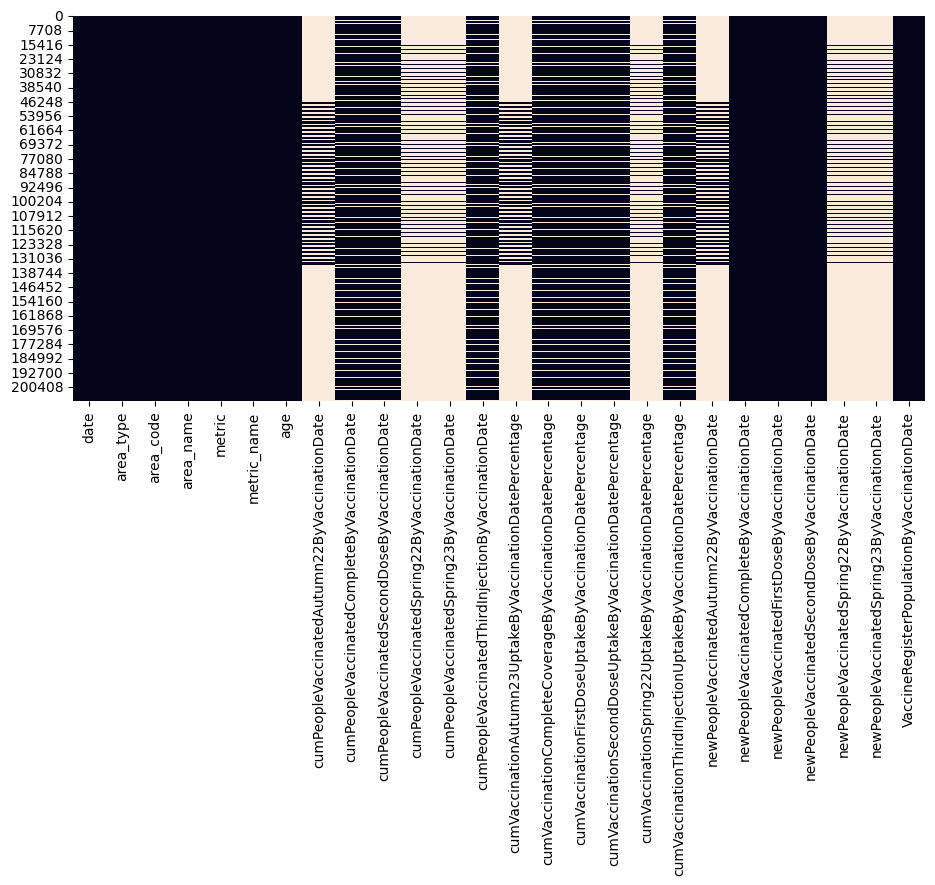

In [25]:
# Visualize missing values
plt.figure(figsize=(11, 5))
sns.heatmap(demographics_dataframe.isnull(), cbar=False)

### Before moving on, I check for duplicates - thankfully there are none so there is no need to address this in the cleaning process

In [26]:
# Check for duplicate rows
print(demographics_dataframe.duplicated().sum())

0


### Interestingly, from manual inspector of the data I note many rows where the age demographic is grouped however the result for the age demographic is reported as 0 - we will need to handle this 

In [27]:
list_ages = list(demographics_dataframe['age'].unique())

grouped_ages = []

ungrouped_ages = []

for age in list_ages:
    if age[-1] == '+':
        grouped_ages.append(age)
    elif int(age[:2]) >=50:
        ungrouped_ages.append(age)
        
print("Grouped ages: ", grouped_ages)
print("Ungrouped ages: ", ungrouped_ages)

Grouped ages:  ['50+', '65+', '75+', '90+']
Ungrouped ages:  ['50_54', '55_59', '60_64', '65_69', '70_74', '75_79', '80_84', '85_89']


In [28]:
grouped_ages_df = demographics_dataframe[(demographics_dataframe['age'].isin(grouped_ages))&(demographics_dataframe['area_name']=='Yorkshire and The Humber')&(demographics_dataframe['date'] == '2020-12-08')]
grouped_ages_df[['date',
                 'area_name',
                 'age',
                 'cumPeopleVaccinatedCompleteByVaccinationDate',
                 'cumPeopleVaccinatedSecondDoseByVaccinationDate',
                 'cumPeopleVaccinatedThirdInjectionByVaccinationDate',
                 'cumVaccinationCompleteCoverageByVaccinationDatePercentage',
                 'cumVaccinationSecondDoseUptakeByVaccinationDatePercentage',
                 'cumVaccinationThirdInjectionUptakeByVaccinationDatePercentage',
                 'newPeopleVaccinatedCompleteByVaccinationDate',
                 'newPeopleVaccinatedFirstDoseByVaccinationDate',
                 'newPeopleVaccinatedSecondDoseByVaccinationDate']]


,date,area_name,age,cumPeopleVaccinatedCompleteByVaccinationDate,cumPeopleVaccinatedSecondDoseByVaccinationDate,cumPeopleVaccinatedThirdInjectionByVaccinationDate,cumVaccinationCompleteCoverageByVaccinationDatePercentage,cumVaccinationSecondDoseUptakeByVaccinationDatePercentage,cumVaccinationThirdInjectionUptakeByVaccinationDatePercentage,newPeopleVaccinatedCompleteByVaccinationDate,newPeopleVaccinatedFirstDoseByVaccinationDate,newPeopleVaccinatedSecondDoseByVaccinationDate
203604,2020-12-08,Yorkshire and The Humber,50+,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0
203608,2020-12-08,Yorkshire and The Humber,65+,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0
203611,2020-12-08,Yorkshire and The Humber,75+,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0
203615,2020-12-08,Yorkshire and The Humber,90+,0.0,0.0,0.0,0.0,0.0,0.0,0,7,0


In [29]:
ungrouped_ages_df = demographics_dataframe[(demographics_dataframe['age'].isin(ungrouped_ages))&(demographics_dataframe['area_name']=='Yorkshire and The Humber')&(demographics_dataframe['date'] == '2020-12-08')]

ungrouped_ages_df[['date',
                 'area_name',
                 'age',
                 'cumPeopleVaccinatedCompleteByVaccinationDate',
                 'cumPeopleVaccinatedSecondDoseByVaccinationDate',
                 'cumPeopleVaccinatedThirdInjectionByVaccinationDate',
                 'cumVaccinationCompleteCoverageByVaccinationDatePercentage',
                 'cumVaccinationSecondDoseUptakeByVaccinationDatePercentage',
                 'cumVaccinationThirdInjectionUptakeByVaccinationDatePercentage',
                 'newPeopleVaccinatedCompleteByVaccinationDate',
                 'newPeopleVaccinatedFirstDoseByVaccinationDate',
                 'newPeopleVaccinatedSecondDoseByVaccinationDate']]

,date,area_name,age,cumPeopleVaccinatedCompleteByVaccinationDate,cumPeopleVaccinatedSecondDoseByVaccinationDate,cumPeopleVaccinatedThirdInjectionByVaccinationDate,cumVaccinationCompleteCoverageByVaccinationDatePercentage,cumVaccinationSecondDoseUptakeByVaccinationDatePercentage,cumVaccinationThirdInjectionUptakeByVaccinationDatePercentage,newPeopleVaccinatedCompleteByVaccinationDate,newPeopleVaccinatedFirstDoseByVaccinationDate,newPeopleVaccinatedSecondDoseByVaccinationDate
203605,2020-12-08,Yorkshire and The Humber,50_54,112.0,112.0,0.0,0.0,0.0,0.0,0,52,0
203606,2020-12-08,Yorkshire and The Humber,55_59,113.0,113.0,0.0,0.0,0.0,0.0,0,86,0
203607,2020-12-08,Yorkshire and The Humber,60_64,96.0,96.0,0.0,0.0,0.0,0.0,0,54,0
203609,2020-12-08,Yorkshire and The Humber,65_69,90.0,90.0,0.0,0.0,0.0,0.0,0,28,0
203610,2020-12-08,Yorkshire and The Humber,70_74,96.0,96.0,0.0,0.0,0.0,0.0,0,14,0
203612,2020-12-08,Yorkshire and The Humber,75_79,46.0,46.0,0.0,0.0,0.0,0.0,0,8,0
203613,2020-12-08,Yorkshire and The Humber,80_84,23.0,23.0,0.0,0.0,0.0,0.0,0,11,0
203614,2020-12-08,Yorkshire and The Humber,85_89,5.0,5.0,0.0,0.0,0.0,0.0,0,17,0


In [30]:
print(ungrouped_ages_df['cumPeopleVaccinatedCompleteByVaccinationDate'].sum())

581.0


### As you can see the cumulative people vaccinated over the age of 50 is certainly not 0 - it is 581, due to this inconsistency I feel it appropriate to drop this data from the set as this can also be computed if felt necessary for visualisation.

#### From reviewing the above data I developed a plan for further refining the data:
- Area type is not required 
- Age groupings need to be dropped due to inconsistencies
- The age ranges are currently stored as a string - operations may be easier with separate age_lower and age_upper columns
- Date needs to be converted to a datetime object

## 4. Handling Missing Data
### As highlighted above I would like to drop the columns which are inconsistent and the values are set to 0 for cumulative vaccinations when vaccinations have occured for this age group

In [31]:
demographics_dataframe.drop(demographics_dataframe[demographics_dataframe['age'].isin(grouped_ages)].index, inplace=True)

### This certainly looks better:

<Axes: >

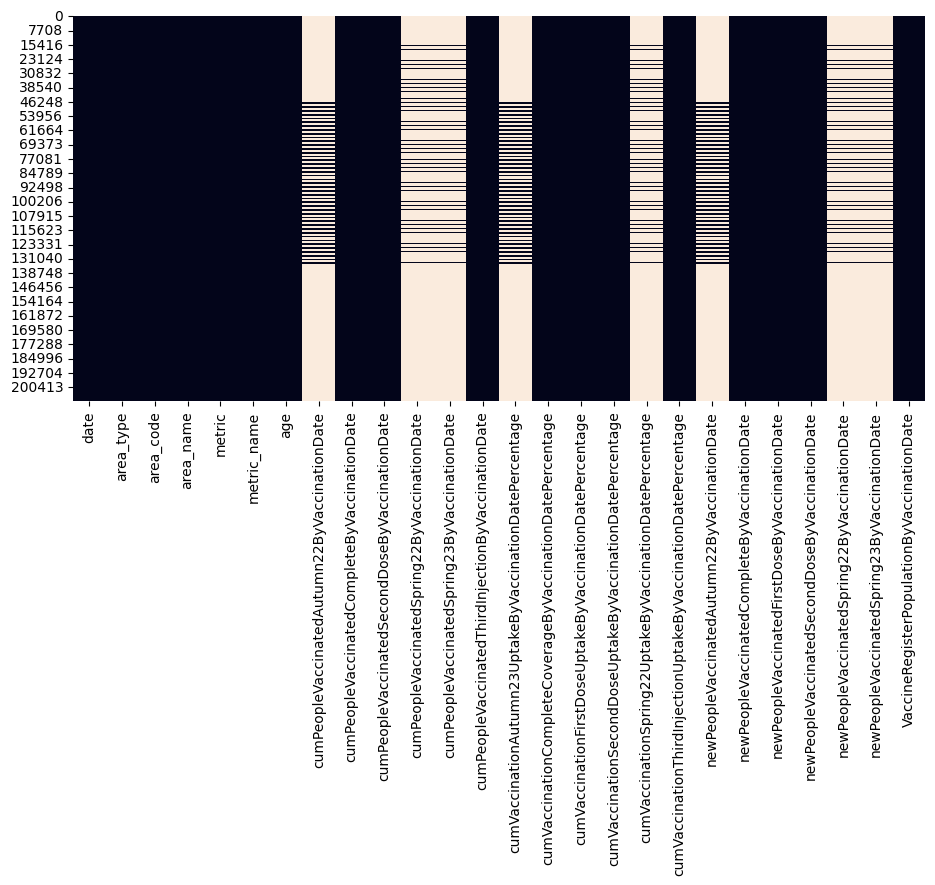

In [32]:
plt.figure(figsize=(11, 5))
sns.heatmap(demographics_dataframe.isnull(), cbar=False)

### As you can see by comparing to the previous heatmap the majority of the columns have no na values left. The remaining metrics are for boosters which were for particular ages of people over specific timeframes this is important data so I do not want to drop these columns I want to confirm that the data seems appropriate and then I will forward fill and back fill the values accordingly.

#### I determine which columns still contain na values:

In [33]:
columns_with_na_values = demographics_dataframe.columns[demographics_dataframe.isna().any()].tolist()
columns_with_na_values

['cumPeopleVaccinatedAutumn22ByVaccinationDate',
 'cumPeopleVaccinatedSpring22ByVaccinationDate',
 'cumPeopleVaccinatedSpring23ByVaccinationDate',
 'cumVaccinationAutumn23UptakeByVaccinationDatePercentage',
 'cumVaccinationSpring22UptakeByVaccinationDatePercentage',
 'newPeopleVaccinatedAutumn22ByVaccinationDate',
 'newPeopleVaccinatedSpring22ByVaccinationDate',
 'newPeopleVaccinatedSpring23ByVaccinationDate']

#### It seems appropriate that all of these columns have na values as they relate to boosters for specific dates. I will not include the percentage data as I do not have the associated raw data to process these columns

#### I will first check that the cumulative calculation is accurate

In [34]:
cumulative_checker = demographics_dataframe.copy()

raw_vaccine_columns = [
    'newPeopleVaccinatedAutumn22ByVaccinationDate',
    'newPeopleVaccinatedSpring22ByVaccinationDate',
    'newPeopleVaccinatedSpring23ByVaccinationDate'
]

new_cumulative_columns = []

for column in raw_vaccine_columns:
    cumulative_column = f'cumulative_{column[3:]}'
    new_cumulative_columns.append(cumulative_column)

cumulative_checker = cumulative_checker.dropna(subset=raw_vaccine_columns, how='all')

cumulative_checker = cumulative_checker.sort_values(by=['date', 'area_name', 'age'])

for column, cumulative_column in zip(raw_vaccine_columns, new_cumulative_columns):
    cumulative_checker[cumulative_column] = cumulative_checker.groupby(['area_name', 'age'])[column].cumsum()

existing_cumulative_columns = [
    'cumPeopleVaccinatedAutumn22ByVaccinationDate',
    'cumPeopleVaccinatedSpring22ByVaccinationDate',
    'cumPeopleVaccinatedSpring23ByVaccinationDate'
]

for i in range(len(existing_cumulative_columns)):
    comparison_result = cumulative_checker[existing_cumulative_columns[i]].equals(cumulative_checker[new_cumulative_columns[i]])
    print(f"Comparison for {new_cumulative_columns[i]} and {existing_cumulative_columns[i]}: {comparison_result}")

Comparison for cumulative_PeopleVaccinatedAutumn22ByVaccinationDate and cumPeopleVaccinatedAutumn22ByVaccinationDate: True
Comparison for cumulative_PeopleVaccinatedSpring22ByVaccinationDate and cumPeopleVaccinatedSpring22ByVaccinationDate: True
Comparison for cumulative_PeopleVaccinatedSpring23ByVaccinationDate and cumPeopleVaccinatedSpring23ByVaccinationDate: True


### As you can see the computed values match those in a column. Now I will check the age groups are representative of those who were eligible for the booster vaccination

In [35]:
Z = demographics_dataframe.copy()

age_checking_dataframe = demographics_dataframe.copy()

age_checking_dataframe = age_checking_dataframe.dropna(subset=raw_vaccine_columns, how='all')

age_groups_for_metrics = {}

for column in columns_with_na_values:
    column_checker = age_checking_dataframe[['age', column]]

    age_groups = column_checker['age'].unique()
    
    age_groups_for_metrics[column] = age_groups

age_groups_for_metrics

{'cumPeopleVaccinatedAutumn22ByVaccinationDate': array(['75_79', '80_84', '85_89', '50_54', '55_59', '60_64', '65_69',
        '70_74'], dtype=object),
 'cumPeopleVaccinatedSpring22ByVaccinationDate': array(['75_79', '80_84', '85_89', '50_54', '55_59', '60_64', '65_69',
        '70_74'], dtype=object),
 'cumPeopleVaccinatedSpring23ByVaccinationDate': array(['75_79', '80_84', '85_89', '50_54', '55_59', '60_64', '65_69',
        '70_74'], dtype=object),
 'cumVaccinationAutumn23UptakeByVaccinationDatePercentage': array(['75_79', '80_84', '85_89', '50_54', '55_59', '60_64', '65_69',
        '70_74'], dtype=object),
 'cumVaccinationSpring22UptakeByVaccinationDatePercentage': array(['75_79', '80_84', '85_89', '50_54', '55_59', '60_64', '65_69',
        '70_74'], dtype=object),
 'newPeopleVaccinatedAutumn22ByVaccinationDate': array(['75_79', '80_84', '85_89', '50_54', '55_59', '60_64', '65_69',
        '70_74'], dtype=object),
 'newPeopleVaccinatedSpring22ByVaccinationDate': array(['75_79', '

### This looks appropriate as those over 50 were eligible for the booster. I now check the date ranges. Note the data ends on 13th December 2023

In [36]:
date_ranges = {}
for column in columns_with_na_values:
    filtered_dataframe = demographics_dataframe[demographics_dataframe[column].notna()]
    filtered_dataframe = filtered_dataframe[['age','area_name', 'date', column]]
    filtered_dataframe['date'] = pd.to_datetime(filtered_dataframe['date'])
    date_range = (filtered_dataframe['date'].min(), filtered_dataframe['date'].max())
    date_ranges[column] = date_range

date_ranges

{'cumPeopleVaccinatedAutumn22ByVaccinationDate': (Timestamp('2022-09-01 00:00:00'),
  Timestamp('2023-12-13 00:00:00')),
 'cumPeopleVaccinatedSpring22ByVaccinationDate': (Timestamp('2022-03-21 00:00:00'),
  Timestamp('2023-12-13 00:00:00')),
 'cumPeopleVaccinatedSpring23ByVaccinationDate': (Timestamp('2022-03-21 00:00:00'),
  Timestamp('2023-12-13 00:00:00')),
 'cumVaccinationAutumn23UptakeByVaccinationDatePercentage': (Timestamp('2022-09-01 00:00:00'),
  Timestamp('2023-12-13 00:00:00')),
 'cumVaccinationSpring22UptakeByVaccinationDatePercentage': (Timestamp('2022-03-21 00:00:00'),
  Timestamp('2023-12-13 00:00:00')),
 'newPeopleVaccinatedAutumn22ByVaccinationDate': (Timestamp('2022-09-01 00:00:00'),
  Timestamp('2023-12-13 00:00:00')),
 'newPeopleVaccinatedSpring22ByVaccinationDate': (Timestamp('2022-03-21 00:00:00'),
  Timestamp('2023-12-13 00:00:00')),
 'newPeopleVaccinatedSpring23ByVaccinationDate': (Timestamp('2022-03-21 00:00:00'),
  Timestamp('2023-12-13 00:00:00'))}

In [37]:
end_dates_for_columns = {}

for column in columns_with_na_values: 
    explore_dates_dataframe = demographics_dataframe.copy()
    explore_dates_dataframe = explore_dates_dataframe.dropna(subset=column)
    explore_dates_dataframe = explore_dates_dataframe[explore_dates_dataframe[column] != 0]
    explore_dates_dataframe =explore_dates_dataframe[['date', 'area_name','age', column]]
    explore_dates_dataframe = explore_dates_dataframe.sort_values(by=['area_name', 'age', 'date'])
    
    explore_dates_dataframe['value_diff'] = explore_dates_dataframe[column].diff()
    
    stopped_changing = explore_dates_dataframe[explore_dates_dataframe['value_diff'] == 0]
    
    if not stopped_changing.empty:
        end_dates_for_columns[column] = {stopped_changing['date'].iloc[0]}
    else:
       end_dates_for_columns[column]  = "Does not stop changing"
       
end_dates_for_columns

{'cumPeopleVaccinatedAutumn22ByVaccinationDate': {'2022-12-25'},
 'cumPeopleVaccinatedSpring22ByVaccinationDate': {'2022-09-01'},
 'cumPeopleVaccinatedSpring23ByVaccinationDate': {'2023-04-09'},
 'cumVaccinationAutumn23UptakeByVaccinationDatePercentage': {'2023-09-02'},
 'cumVaccinationSpring22UptakeByVaccinationDatePercentage': {'2022-08-29'},
 'newPeopleVaccinatedAutumn22ByVaccinationDate': {'2023-02-21'},
 'newPeopleVaccinatedSpring22ByVaccinationDate': {'2022-08-29'},
 'newPeopleVaccinatedSpring23ByVaccinationDate': {'2023-06-20'}}

In [38]:
start_dates_for_columns = {}

for column in columns_with_na_values:
    explore_dates_dataframe = demographics_dataframe.copy()
    
    explore_dates_dataframe = explore_dates_dataframe.dropna(subset=[column])
    
    explore_dates_dataframe = explore_dates_dataframe[['date', 'area_name', 'age', column]]
    explore_dates_dataframe = explore_dates_dataframe.sort_values(by=['area_name', 'age', 'date'])
    
    explore_dates_dataframe['value_diff'] = explore_dates_dataframe[column].diff()
    
    start_collecting = explore_dates_dataframe[explore_dates_dataframe[column] > 0]
    
    if not start_collecting.empty:
        start_dates_for_columns[column] = {start_collecting['date'].iloc[0]}
    else:
        start_dates_for_columns[column] = "Does not start collecting"
        
start_dates_for_columns

{'cumPeopleVaccinatedAutumn22ByVaccinationDate': {'2022-09-01'},
 'cumPeopleVaccinatedSpring22ByVaccinationDate': {'2022-03-21'},
 'cumPeopleVaccinatedSpring23ByVaccinationDate': {'2023-04-03'},
 'cumVaccinationAutumn23UptakeByVaccinationDatePercentage': {'2023-09-01'},
 'cumVaccinationSpring22UptakeByVaccinationDatePercentage': {'2022-03-21'},
 'newPeopleVaccinatedAutumn22ByVaccinationDate': {'2022-09-01'},
 'newPeopleVaccinatedSpring22ByVaccinationDate': {'2022-03-21'},
 'newPeopleVaccinatedSpring23ByVaccinationDate': {'2023-04-03'}}

### This makes me trust the data as the dates seem appropriate. I will therefore forward fill and reverse fill the "newPeopleVaccinated" data columns with 0 and reverse fill the cumulative columns with 0 and forward fill with the maximum value

#### I first drop the columns I do not wish to include in the data (percentage)

In [39]:
columns_to_be_removed = ['cumVaccinationAutumn23UptakeByVaccinationDatePercentage', 'cumVaccinationSpring22UptakeByVaccinationDatePercentage']
demographics_dataframe.drop(columns=columns_to_be_removed, inplace=True)

### I then fill the NaN values for the 'newPeopleVaccinated' rows for the boosters with 0 and recalculate the cumulative values and update it. I also add columns which show the start and end date of the booster period

In [40]:
new_vaccine_columns = [
    'newPeopleVaccinatedAutumn22ByVaccinationDate',
    'newPeopleVaccinatedSpring22ByVaccinationDate',
    'newPeopleVaccinatedSpring23ByVaccinationDate'
]

cumulative_columns = [
    'cumPeopleVaccinatedAutumn22ByVaccinationDate',
    'cumPeopleVaccinatedSpring22ByVaccinationDate',
    'cumPeopleVaccinatedSpring23ByVaccinationDate'
]

for column in new_vaccine_columns:
    demographics_dataframe[column] = demographics_dataframe[column].fillna(0)

for new_column, cumulative_column in zip(new_vaccine_columns, cumulative_columns):
    demographics_dataframe[cumulative_column] = demographics_dataframe.groupby(['area_name', 'age'])[new_column].cumsum()


<Axes: >

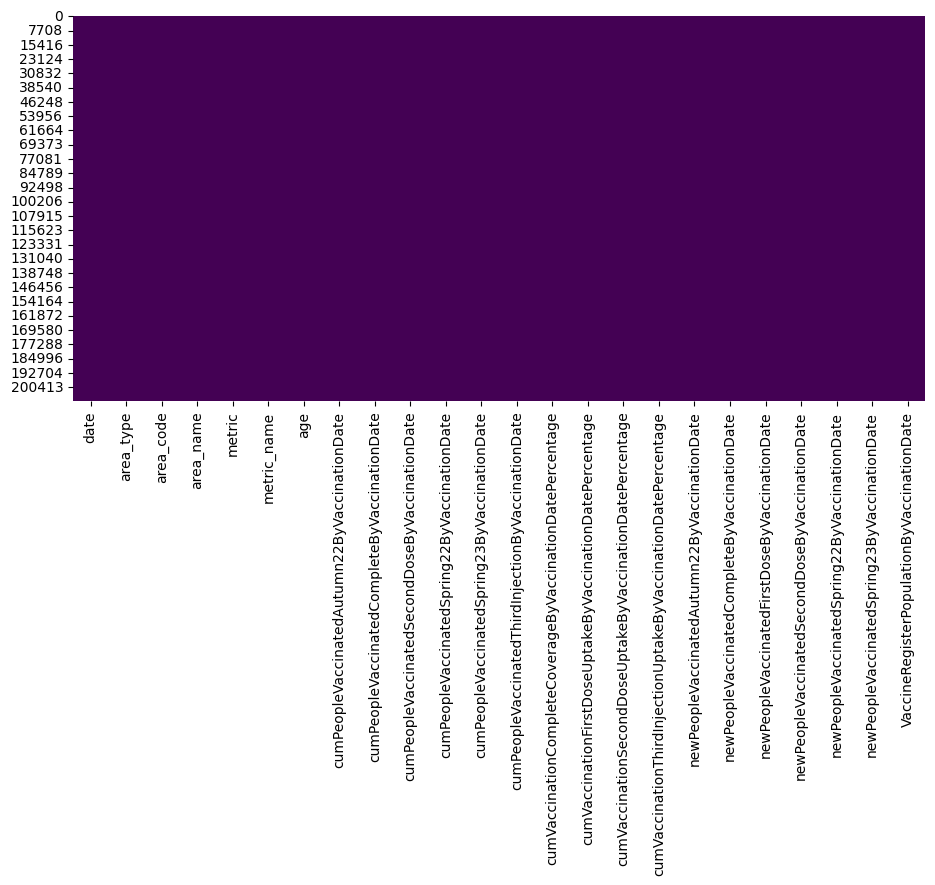

In [41]:
plt.figure(figsize=(11, 5))
sns.heatmap(demographics_dataframe.isnull(), cbar=False, cmap='viridis')

## As you can see the empty data has been handled appropriately

In [42]:
demographics_dataframe

,date,area_type,area_code,area_name,metric,metric_name,age,cumPeopleVaccinatedAutumn22ByVaccinationDate,cumPeopleVaccinatedCompleteByVaccinationDate,cumPeopleVaccinatedSecondDoseByVaccinationDate,...,cumVaccinationFirstDoseUptakeByVaccinationDatePercentage,cumVaccinationSecondDoseUptakeByVaccinationDatePercentage,cumVaccinationThirdInjectionUptakeByVaccinationDatePercentage,newPeopleVaccinatedAutumn22ByVaccinationDate,newPeopleVaccinatedCompleteByVaccinationDate,newPeopleVaccinatedFirstDoseByVaccinationDate,newPeopleVaccinatedSecondDoseByVaccinationDate,newPeopleVaccinatedSpring22ByVaccinationDate,newPeopleVaccinatedSpring23ByVaccinationDate,VaccineRegisterPopulationByVaccinationDate
0,2022-01-01,region,E12000003,Yorkshire and The Humber,vaccinationsAgeDemographics,Vaccinations age demographics breakdown,05_11,0.0,7.0,7.0,...,0.0,0.0,0.0,0.0,0,0,0,0.0,0.0,484231
1,2022-01-01,region,E12000003,Yorkshire and The Humber,vaccinationsAgeDemographics,Vaccinations age demographics breakdown,12_15,0.0,3510.0,3510.0,...,25.3,1.2,0.0,0.0,24,29,24,0.0,0.0,288773
2,2022-01-01,region,E12000003,Yorkshire and The Humber,vaccinationsAgeDemographics,Vaccinations age demographics breakdown,16_17,0.0,4875.0,4875.0,...,50.4,3.5,0.0,0.0,29,18,29,0.0,0.0,137934
3,2022-01-01,region,E12000003,Yorkshire and The Humber,vaccinationsAgeDemographics,Vaccinations age demographics breakdown,18_24,0.0,281111.0,281111.0,...,67.1,54.8,17.9,0.0,69,35,69,0.0,0.0,513378
4,2022-01-01,region,E12000003,Yorkshire and The Humber,vaccinationsAgeDemographics,Vaccinations age demographics breakdown,25_29,0.0,242248.0,242248.0,...,65.8,58.8,24.3,0.0,26,29,26,0.0,0.0,412127
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
208082,2020-12-31,region,E12000008,South East,vaccinationsAgeDemographics,Vaccinations age demographics breakdown,65_69,387092.0,172.0,172.0,...,1.1,0.0,0.0,0.0,26,511,26,0.0,0.0,502739
208083,2020-12-31,region,E12000008,South East,vaccinationsAgeDemographics,Vaccinations age demographics breakdown,70_74,374309.0,163.0,163.0,...,0.5,0.0,0.0,0.0,10,234,10,0.0,0.0,450957
208085,2020-12-31,region,E12000008,South East,vaccinationsAgeDemographics,Vaccinations age demographics breakdown,75_79,375021.0,155.0,155.0,...,0.7,0.0,0.0,0.0,2,582,2,0.0,0.0,434632
208086,2020-12-31,region,E12000008,South East,vaccinationsAgeDemographics,Vaccinations age demographics breakdown,80_84,235158.0,121.0,121.0,...,10.8,0.0,0.0,0.0,23,1807,23,0.0,0.0,268600


### Finally I am dropping unnecessary columns

In [43]:
columns_to_drop = ['area_type', 'area_code', 'metric']
demographics_dataframe = demographics_dataframe.drop(columns=columns_to_drop)

## 5. Handling Duplicates

### Reassuringly, there is no duplicate data in this dataset, therefore this will not need addressing

In [44]:
# Checking the number of duplicates
print(demographics_dataframe.duplicated().sum())

0



## 6. Data Type Conversion
### I will need to convert the date column to a datetime object to facilitate time series plots as you can see following my manipulation the column is a datetime object

In [45]:
# Convert a date column to datetime
demographics_dataframe['date'] = pd.to_datetime(demographics_dataframe['date'], errors='coerce')

In [46]:
demographics_dataframe.info()

<class 'pandas.core.frame.DataFrame'>
Index: 168453 entries, 0 to 208087
Data columns (total 21 columns):
 #   Column                                                         Non-Null Count   Dtype         
---  ------                                                         --------------   -----         
 0   date                                                           168453 non-null  datetime64[ns]
 1   area_name                                                      168453 non-null  object        
 2   metric_name                                                    168453 non-null  object        
 3   age                                                            168453 non-null  object        
 4   cumPeopleVaccinatedAutumn22ByVaccinationDate                   168453 non-null  float64       
 5   cumPeopleVaccinatedCompleteByVaccinationDate                   168453 non-null  float64       
 6   cumPeopleVaccinatedSecondDoseByVaccinationDate                 168453 non-null  float64  

## 7. Handling Outliers
### I first of all get a list of numerical columns and plot a box plot for each using seaborn to visually inspect for outliers

In [47]:
numerical_columns = demographics_dataframe.select_dtypes(include=['number']).columns.tolist()

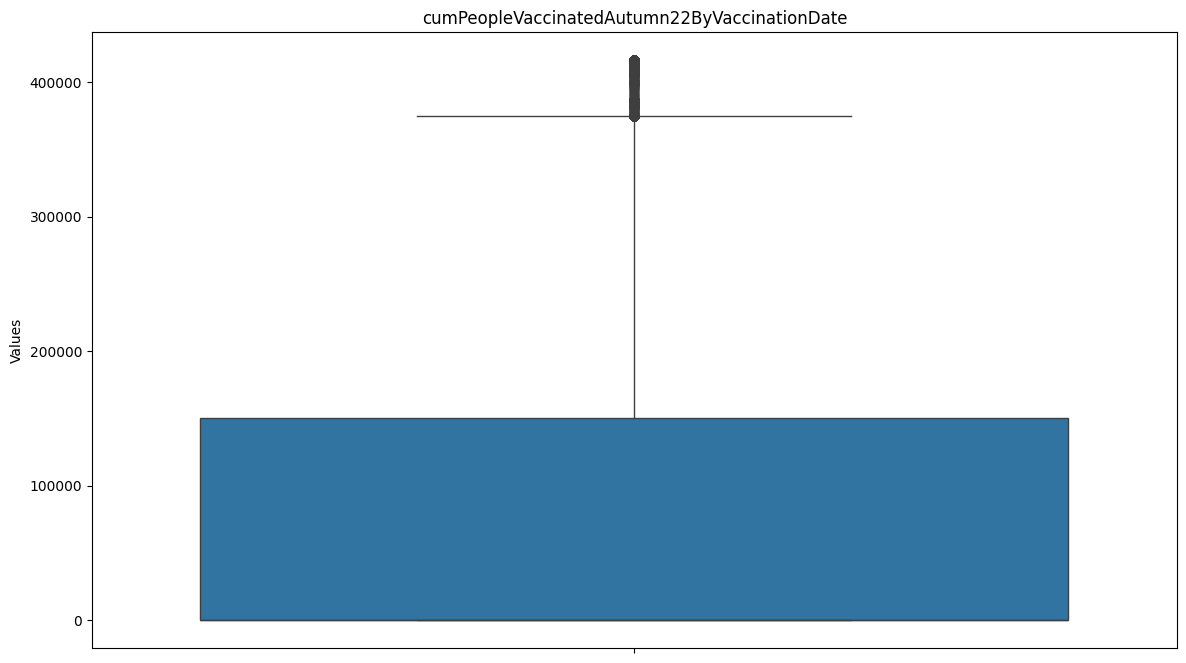

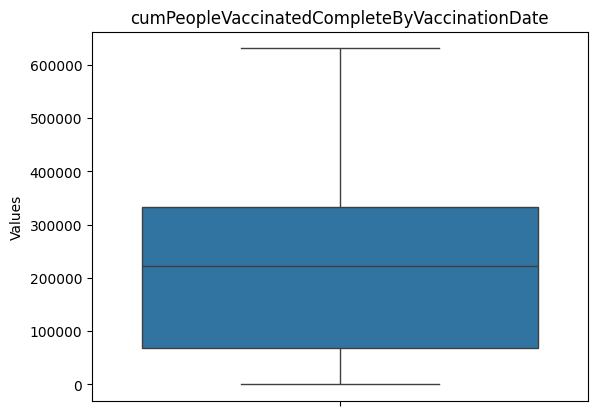

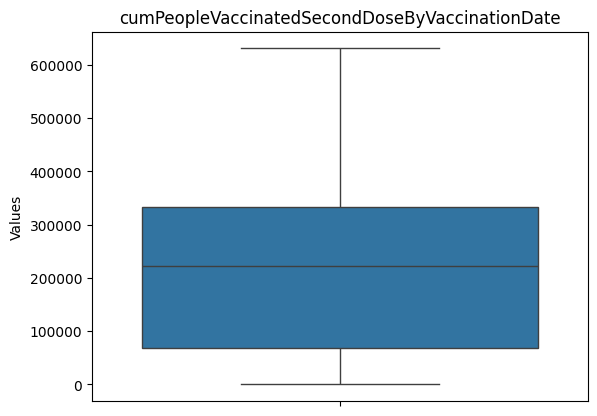

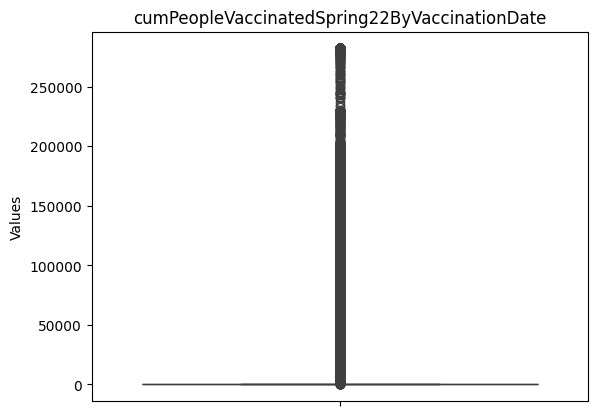

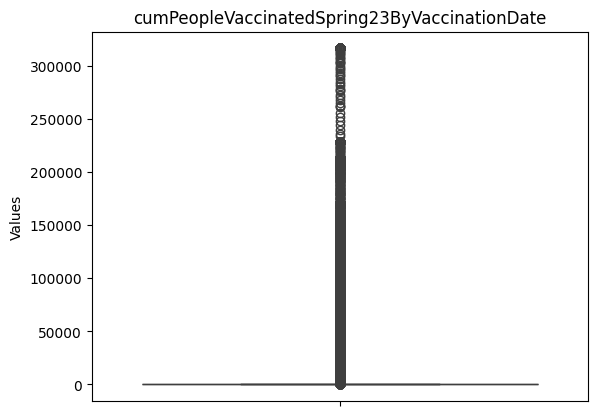

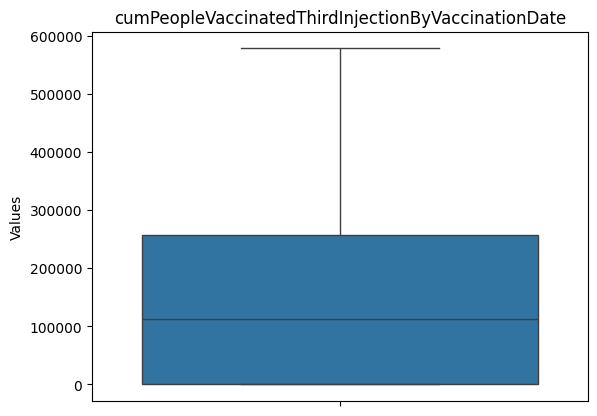

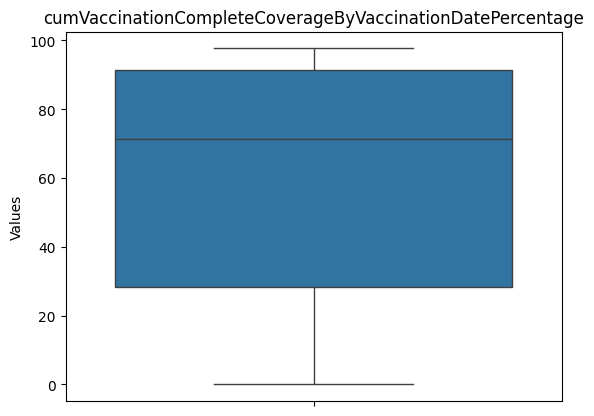

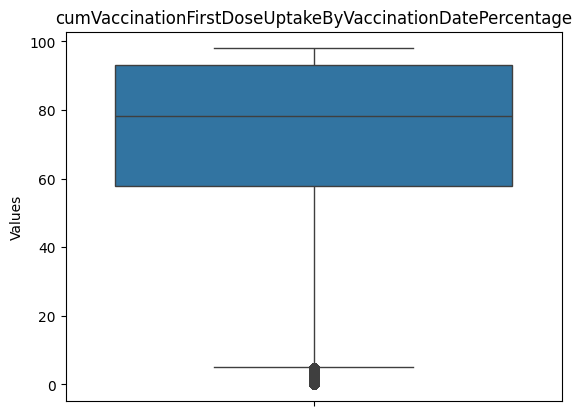

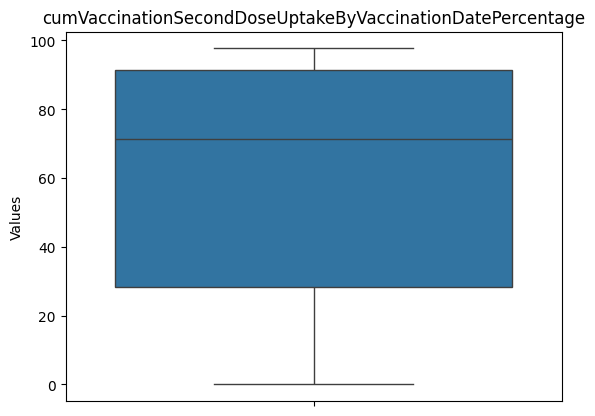

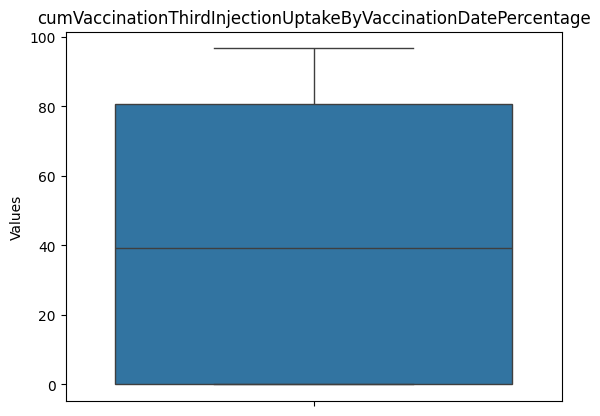

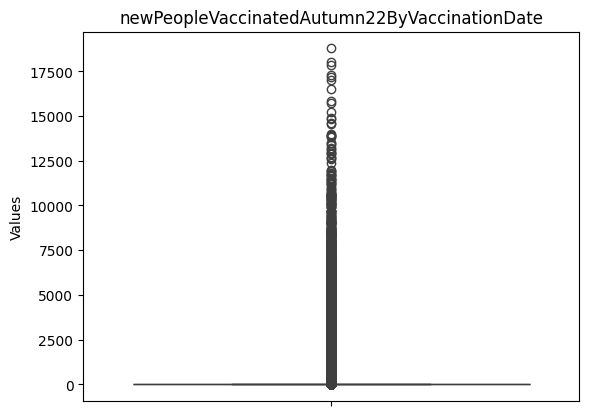

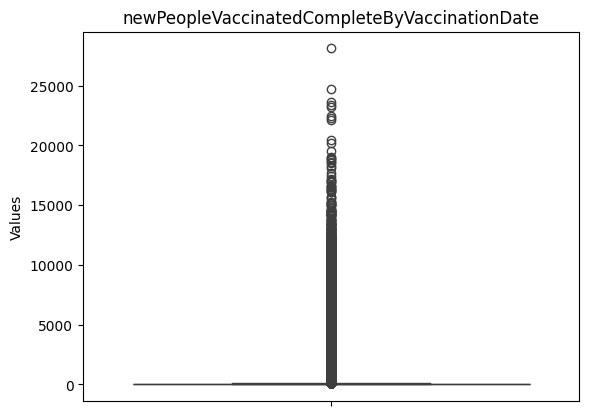

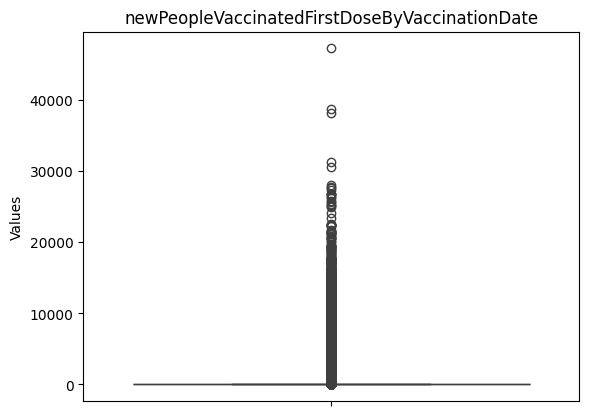

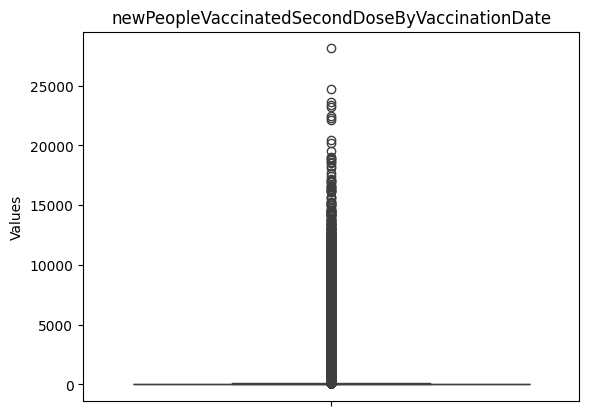

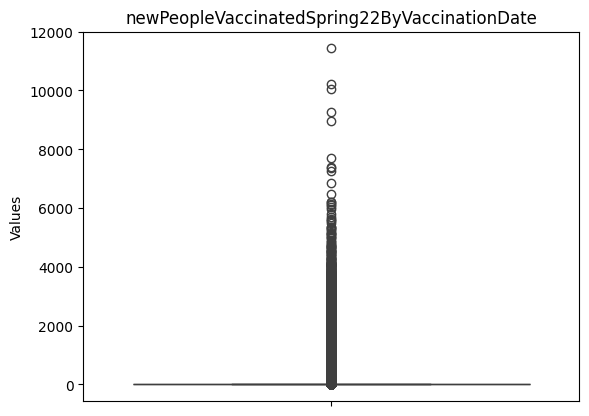

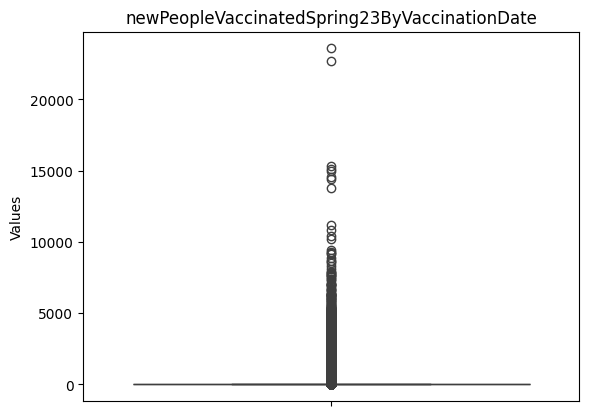

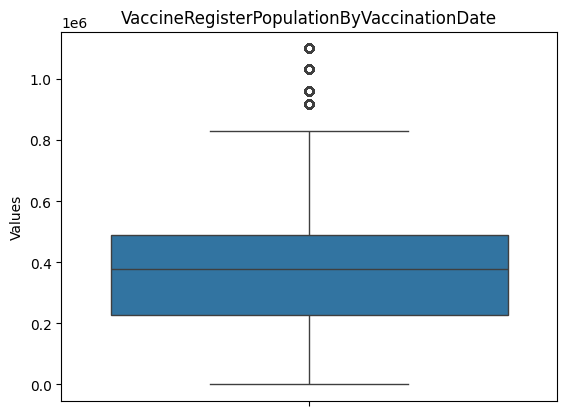

In [48]:
plt.figure(figsize=(14, 8))

for column in numerical_columns:
    sns.boxplot(demographics_dataframe[column])
    
    plt.title(f"{column}")
    plt.ylabel("Values")
    
    plt.xticks(rotation=90)
    plt.show()

## 8. Handling Outliers
### As you can see from inspection of the boxplots, there are a few numerical columns with outliers however if you consider the outliers themselves they are appropriate for the dataset, the percentage columns range from 0 to 100, the cumulative columns all begin at 0 and the number of doses of the vaccine seem appropriate (fewer vaccines for the booster sessions which only run over a few months). I therefore opt not to remove this data as I feel it is important within the visualisation and not erroneous. 


## 9. Standardizing or Normalizing Data


In [49]:
demographics_dataframe

,date,area_name,metric_name,age,cumPeopleVaccinatedAutumn22ByVaccinationDate,cumPeopleVaccinatedCompleteByVaccinationDate,cumPeopleVaccinatedSecondDoseByVaccinationDate,cumPeopleVaccinatedSpring22ByVaccinationDate,cumPeopleVaccinatedSpring23ByVaccinationDate,cumPeopleVaccinatedThirdInjectionByVaccinationDate,...,cumVaccinationFirstDoseUptakeByVaccinationDatePercentage,cumVaccinationSecondDoseUptakeByVaccinationDatePercentage,cumVaccinationThirdInjectionUptakeByVaccinationDatePercentage,newPeopleVaccinatedAutumn22ByVaccinationDate,newPeopleVaccinatedCompleteByVaccinationDate,newPeopleVaccinatedFirstDoseByVaccinationDate,newPeopleVaccinatedSecondDoseByVaccinationDate,newPeopleVaccinatedSpring22ByVaccinationDate,newPeopleVaccinatedSpring23ByVaccinationDate,VaccineRegisterPopulationByVaccinationDate
0,2022-01-01,Yorkshire and The Humber,Vaccinations age demographics breakdown,05_11,0.0,7.0,7.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0,0,0,0.0,0.0,484231
1,2022-01-01,Yorkshire and The Humber,Vaccinations age demographics breakdown,12_15,0.0,3510.0,3510.0,0.0,0.0,9.0,...,25.3,1.2,0.0,0.0,24,29,24,0.0,0.0,288773
2,2022-01-01,Yorkshire and The Humber,Vaccinations age demographics breakdown,16_17,0.0,4875.0,4875.0,0.0,0.0,28.0,...,50.4,3.5,0.0,0.0,29,18,29,0.0,0.0,137934
3,2022-01-01,Yorkshire and The Humber,Vaccinations age demographics breakdown,18_24,0.0,281111.0,281111.0,0.0,0.0,91939.0,...,67.1,54.8,17.9,0.0,69,35,69,0.0,0.0,513378
4,2022-01-01,Yorkshire and The Humber,Vaccinations age demographics breakdown,25_29,0.0,242248.0,242248.0,0.0,0.0,100286.0,...,65.8,58.8,24.3,0.0,26,29,26,0.0,0.0,412127
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
208082,2020-12-31,South East,Vaccinations age demographics breakdown,65_69,387092.0,172.0,172.0,0.0,0.0,0.0,...,1.1,0.0,0.0,0.0,26,511,26,0.0,0.0,502739
208083,2020-12-31,South East,Vaccinations age demographics breakdown,70_74,374309.0,163.0,163.0,0.0,0.0,0.0,...,0.5,0.0,0.0,0.0,10,234,10,0.0,0.0,450957
208085,2020-12-31,South East,Vaccinations age demographics breakdown,75_79,375021.0,155.0,155.0,282142.0,316376.0,0.0,...,0.7,0.0,0.0,0.0,2,582,2,0.0,0.0,434632
208086,2020-12-31,South East,Vaccinations age demographics breakdown,80_84,235158.0,121.0,121.0,229337.0,207606.0,0.0,...,10.8,0.0,0.0,0.0,23,1807,23,0.0,0.0,268600


In [50]:
demographics_dataframe['area_name'] = demographics_dataframe['area_name'].str.strip().str.lower().str.replace(' ', '_')

demographics_dataframe['metric_name'] = demographics_dataframe['metric_name'].str.strip().str.lower().str.replace(' ', '_')

In [51]:
demographics_dataframe

,date,area_name,metric_name,age,cumPeopleVaccinatedAutumn22ByVaccinationDate,cumPeopleVaccinatedCompleteByVaccinationDate,cumPeopleVaccinatedSecondDoseByVaccinationDate,cumPeopleVaccinatedSpring22ByVaccinationDate,cumPeopleVaccinatedSpring23ByVaccinationDate,cumPeopleVaccinatedThirdInjectionByVaccinationDate,...,cumVaccinationFirstDoseUptakeByVaccinationDatePercentage,cumVaccinationSecondDoseUptakeByVaccinationDatePercentage,cumVaccinationThirdInjectionUptakeByVaccinationDatePercentage,newPeopleVaccinatedAutumn22ByVaccinationDate,newPeopleVaccinatedCompleteByVaccinationDate,newPeopleVaccinatedFirstDoseByVaccinationDate,newPeopleVaccinatedSecondDoseByVaccinationDate,newPeopleVaccinatedSpring22ByVaccinationDate,newPeopleVaccinatedSpring23ByVaccinationDate,VaccineRegisterPopulationByVaccinationDate
0,2022-01-01,yorkshire_and_the_humber,vaccinations_age_demographics_breakdown,05_11,0.0,7.0,7.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0,0,0,0.0,0.0,484231
1,2022-01-01,yorkshire_and_the_humber,vaccinations_age_demographics_breakdown,12_15,0.0,3510.0,3510.0,0.0,0.0,9.0,...,25.3,1.2,0.0,0.0,24,29,24,0.0,0.0,288773
2,2022-01-01,yorkshire_and_the_humber,vaccinations_age_demographics_breakdown,16_17,0.0,4875.0,4875.0,0.0,0.0,28.0,...,50.4,3.5,0.0,0.0,29,18,29,0.0,0.0,137934
3,2022-01-01,yorkshire_and_the_humber,vaccinations_age_demographics_breakdown,18_24,0.0,281111.0,281111.0,0.0,0.0,91939.0,...,67.1,54.8,17.9,0.0,69,35,69,0.0,0.0,513378
4,2022-01-01,yorkshire_and_the_humber,vaccinations_age_demographics_breakdown,25_29,0.0,242248.0,242248.0,0.0,0.0,100286.0,...,65.8,58.8,24.3,0.0,26,29,26,0.0,0.0,412127
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
208082,2020-12-31,south_east,vaccinations_age_demographics_breakdown,65_69,387092.0,172.0,172.0,0.0,0.0,0.0,...,1.1,0.0,0.0,0.0,26,511,26,0.0,0.0,502739
208083,2020-12-31,south_east,vaccinations_age_demographics_breakdown,70_74,374309.0,163.0,163.0,0.0,0.0,0.0,...,0.5,0.0,0.0,0.0,10,234,10,0.0,0.0,450957
208085,2020-12-31,south_east,vaccinations_age_demographics_breakdown,75_79,375021.0,155.0,155.0,282142.0,316376.0,0.0,...,0.7,0.0,0.0,0.0,2,582,2,0.0,0.0,434632
208086,2020-12-31,south_east,vaccinations_age_demographics_breakdown,80_84,235158.0,121.0,121.0,229337.0,207606.0,0.0,...,10.8,0.0,0.0,0.0,23,1807,23,0.0,0.0,268600


## 10. Final Review and Summary

In [52]:
# Check for missing values after cleaning
demographics_dataframe.isnull().sum()

date                                                             0
area_name                                                        0
metric_name                                                      0
age                                                              0
cumPeopleVaccinatedAutumn22ByVaccinationDate                     0
cumPeopleVaccinatedCompleteByVaccinationDate                     0
cumPeopleVaccinatedSecondDoseByVaccinationDate                   0
cumPeopleVaccinatedSpring22ByVaccinationDate                     0
cumPeopleVaccinatedSpring23ByVaccinationDate                     0
cumPeopleVaccinatedThirdInjectionByVaccinationDate               0
cumVaccinationCompleteCoverageByVaccinationDatePercentage        0
cumVaccinationFirstDoseUptakeByVaccinationDatePercentage         0
cumVaccinationSecondDoseUptakeByVaccinationDatePercentage        0
cumVaccinationThirdInjectionUptakeByVaccinationDatePercentage    0
newPeopleVaccinatedAutumn22ByVaccinationDate                  

In [53]:
# Verify the data types again
demographics_dataframe.info()

<class 'pandas.core.frame.DataFrame'>
Index: 168453 entries, 0 to 208087
Data columns (total 21 columns):
 #   Column                                                         Non-Null Count   Dtype         
---  ------                                                         --------------   -----         
 0   date                                                           168453 non-null  datetime64[ns]
 1   area_name                                                      168453 non-null  object        
 2   metric_name                                                    168453 non-null  object        
 3   age                                                            168453 non-null  object        
 4   cumPeopleVaccinatedAutumn22ByVaccinationDate                   168453 non-null  float64       
 5   cumPeopleVaccinatedCompleteByVaccinationDate                   168453 non-null  float64       
 6   cumPeopleVaccinatedSecondDoseByVaccinationDate                 168453 non-null  float64  

## 11. Saving Cleaned Data

In [54]:
# Save the cleaned data to a new CSV file
demographics_dataframe.to_csv('2_cleaned_files/ukhsa_vaccination_data/ukhsa_vaccination_data_cleaned.csv', index=False)